# 케라스 보스턴 주택 가격 모델

### modules import

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model #모델을 이미지로 출력

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-4-4710e14ee41e>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


### 데이터 로드
- 데이터의 수가 상당히 적기 때문에 테스트 데이터의 비율을 20%로 지정

- 13개의 특성을 가짐

- 각각의 특성이 모두 다른 스케일, 즉 단위가 모두 다름
  - 범죄율: 0~1 사이의 값
  - 방의 개수 3~9 사이의 값

- 정답 레이블은 주택 가격의 중간가격($1000 단위)

In [ ]:
tf.random.set_seed(111)
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                           test_split=0.2,
                                                           seed=111)

57026/57026 [==============================] - 0s 0us/step


### 데이터 확인

In [ ]:
print("학습 데이터 : {}\t레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("테스트 데이터 : {}\t레이블: {}".format(x_test.shape,y_test.shape))

학습 데이터 : (404, 13)	레이블: (404,)
테스트 데이터 : (102, 13)	레이블: (102,)


In [ ]:
print(x_train_full[0])

[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]


In [ ]:
print(y_train_full[0])

25.0


### 데이터 전처리
- Standardization

- 특성의 단위가 모두 다르기 때문에 **동일한 범위로 조정**

In [ ]:
mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full, 
                                                  test_size=0.3,
                                                  random_state=111)

In [ ]:
print("총학습 데이터 : {}\t레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터 : {}\t레이블: {}".format(x_train.shape,y_train.shape))
print("검증 데이터 : {}\t레이블: {}".format(x_val.shape,y_val.shape))
print("테스트 데이터 : {}\t레이블: {}".format(x_test.shape,y_test.shape))

총학습 데이터 : (404, 13)	레이블: (404,)
학습 데이터 : (282, 13)	레이블: (282,)
검증 데이터 : (122, 13)	레이블: (122,)
테스트 데이터 : (102, 13)	레이블: (102,)


### 모델 구성
- 학습 데이터가 매우 적은 경우에 모델의 깊이를 깊게 할수록  
  과대적합(Overfitting)이 일어날 확률이 높음

In [ ]:
model = Sequential([Dense(100, activation='relu',input_shape=(13,), name='dense1'),
                    Dense(64, activation='relu', name='dense2'),
                    Dense(32, activation='relu', name='dense3'),
                    Dense(1, name='Output')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 100)               1400      
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


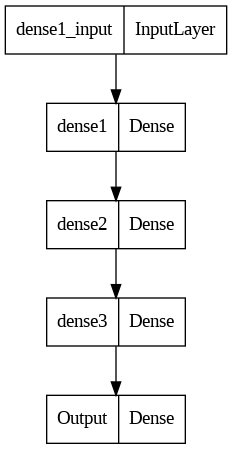

In [ ]:
plot_model(model)

### 모델 컴파일(compile)

- 회귀 문제에서는 주로 평균제곱오차(MSE, Mean Squared Error)를 손실함수로,  
  평균절대오차(MAE, Mean Absolute Error)를 평가지표로 많이 사용!

In [ ]:
model.compile(loss='mse',
              optimizer=Adam(learning_rate=1e-2),
              metrics=['mae'])

### 모델 학습

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=300,
                    validation_data=(x_val, y_val))

Epoch 1/300
9/9 [==============================] - 1s 31ms/step - loss: 311.8978 - mae: 14.9301 - val_loss: 187.8834 - val_mae: 10.9162
Epoch 2/300
9/9 [==============================] - 0s 8ms/step - loss: 76.8577 - mae: 6.5149 - val_loss: 61.3407 - val_mae: 6.3606
Epoch 3/300
9/9 [==============================] - 0s 8ms/step - loss: 40.9691 - mae: 4.8213 - val_loss: 23.4088 - val_mae: 3.7232
Epoch 4/300
9/9 [==============================] - 0s 7ms/step - loss: 22.9189 - mae: 3.5188 - val_loss: 17.8369 - val_mae: 3.1300
Epoch 5/300
9/9 [==============================] - 0s 8ms/step - loss: 18.9783 - mae: 3.1769 - val_loss: 15.6516 - val_mae: 2.9705
Epoch 6/300
9/9 [==============================] - 0s 9ms/step - loss: 14.8704 - mae: 2.6359 - val_loss: 11.9918 - val_mae: 2.7243
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 13.4268 - mae: 2.4730 - val_loss: 9.8109 - val_mae: 2.3933
Epoch 8/300
9/9 [==============================] - 0s 8ms/step - loss: 13.5916 

### 모델 평가 
- `evaluate()`

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 14.0219 - mae: 2.4011


[14.0219087600708, 2.4010977745056152]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


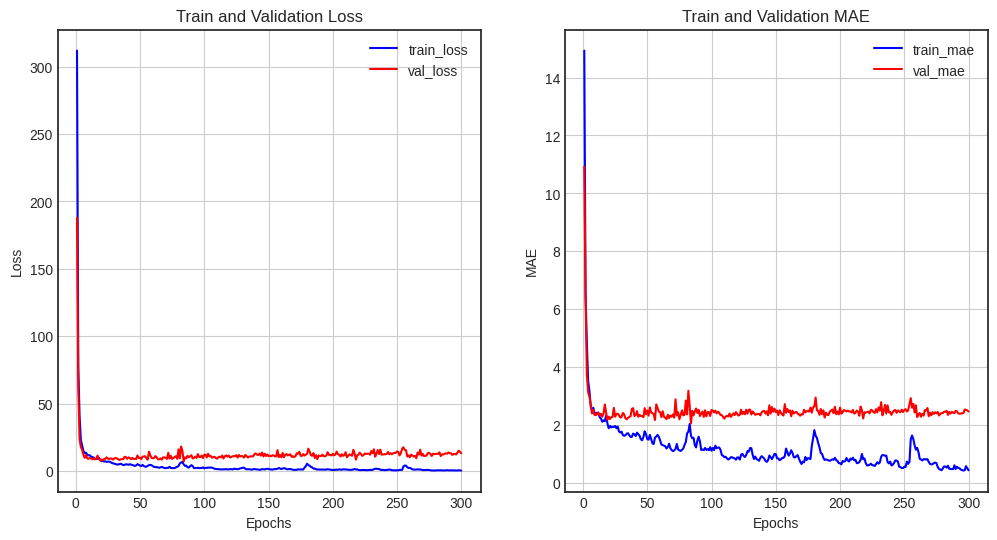

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, mae, color='blue', label='train_mae')
ax2.plot(epochs, val_mae, color='red', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

### K-Fold 교차 검증

- 데이터셋의 크기가 매우 작은 경우에  
  [훈련, 검증, 테스트] 데이터로 나누게 되면 과소적합이 일어날 확률이 높음

- 이를 해결하기 위해 K-Fold 교차 검증 실행
  <br>

  <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="600">

  <sub>출처: https://scikit-learn.org/stable/modules/cross_validation.html</sub>

### 모델 재구성

In [ ]:
from sklearn.model_selection import KFold

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                           test_split=0.2,
                                                           seed=111)

mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

In [ ]:
k = 3

kfold = KFold(n_splits = k)

In [ ]:
def build_model():
  input = Input(shape=(13,), name='input')
  hidden1 = Dense(100, activation='relu',name='dense1')(input)
  hidden2 = Dense(64, activation='relu', name='dense2')(hidden1)
  hidden3 = Dense(32, activation='relu', name='dense3')(hidden2)
  output = Dense(1, name='Output')(hidden3)

  model = Model(inputs=[input], outputs=output)

  model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])
  
  return model


In [ ]:
mae_list = []

In [ ]:
for train_idx, val_idx in kfold.split(x_train):
  x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

  model = build_model()

  model.fit(x_train_fold, y_train_fold, epochs=300, 
            validation_data=(x_val_fold, y_val_fold))

  _, test_mae = model.evaluate(x_test, y_test)
  mae_list.append(test_mae)

Epoch 1/300
6/6 [==============================] - 2s 62ms/step - loss: 583.0266 - mae: 22.2046 - val_loss: 518.8218 - val_mae: 21.3726
Epoch 2/300
6/6 [==============================] - 0s 16ms/step - loss: 564.5551 - mae: 21.8187 - val_loss: 502.9048 - val_mae: 21.0122
Epoch 3/300
6/6 [==============================] - 0s 13ms/step - loss: 544.8876 - mae: 21.3984 - val_loss: 483.0631 - val_mae: 20.5498
Epoch 4/300
6/6 [==============================] - 0s 17ms/step - loss: 519.4212 - mae: 20.8222 - val_loss: 455.1149 - val_mae: 19.8728
Epoch 5/300
6/6 [==============================] - 0s 13ms/step - loss: 483.7363 - mae: 19.9699 - val_loss: 414.3841 - val_mae: 18.8353
Epoch 6/300
6/6 [==============================] - 0s 16ms/step - loss: 431.0028 - mae: 18.6533 - val_loss: 355.5162 - val_mae: 17.2580
Epoch 7/300
6/6 [==============================] - 0s 16ms/step - loss: 359.4232 - mae: 16.7196 - val_loss: 278.7632 - val_mae: 14.9912
Epoch 8/300
6/6 [==============================]

In [ ]:
print(mae_list)

[3.2129039764404297, 2.925931692123413, 3.5450477600097656]


In [ ]:
print(np.mean(mae_list))

3.2279611428578696
